# 노드 예제

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

print("슝~")

슝~


In [2]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

print("슝~")

슝~


In [3]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [4]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [5]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B))

0.6457646122337399


In [6]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [7]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [8]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


In [9]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


Matplotlib is building the font cache; this may take a moment.


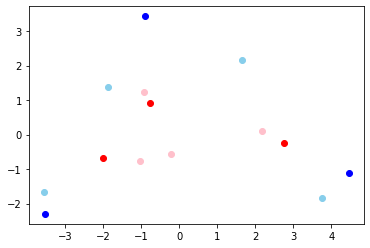

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

In [11]:
import os

data_dir = '~/aiffel/weat' 
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

In [12]:
w2v

In [13]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. 
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
print(w2v.vectors.shape)

500000
300
(500000, 300)


In [14]:
target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.2624874

In [15]:


import numpy as np

# target_X에 월, 화, 수, 목, 금, 평일 관련 단어들
target_X = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

# target_Y에 토, 일, 주말, 휴일 관련 단어들
target_Y = ['Saturday', 'Sunday', 'weekend', 'holiday']

# attribute_A에 일, 회사, 공부 관련 단어들
attribute_A = ['work', 'company', 'study', 'job']

# attribute_B에 놀기, 데이트, 휴식, 운동 관련 단어들
attribute_B = ['play', 'date', 'exercise', 'relaxation']

# 벡터화
X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

# 예시로 제공된 weat_score 함수를 실행
weat_score(X, Y, A, B)


1.8924209

In [16]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


## 직접 만드는 Word Embedding에 WEAT 적용(1)

### STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [17]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [ ]:
# pip install konlpy

In [18]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

print("슝~")

슝~


In [19]:
print(len(tokenized))

71156


In [20]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.880513608455658),
 ('다큐멘터리', 0.8567180633544922),
 ('드라마', 0.8262733221054077),
 ('영화로', 0.8044133186340332),
 ('주제', 0.7930216789245605),
 ('형식', 0.7911615967750549),
 ('실화', 0.7894465923309326),
 ('코미디', 0.781643807888031),
 ('감동', 0.7682205438613892),
 ('소재', 0.7659743428230286)]

In [21]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.7184658050537109),
 ('아르튬', 0.7035961747169495),
 ('셰카르', 0.690434992313385),
 ('연애', 0.6891956329345703),
 ('만남', 0.6870867609977722),
 ('진심', 0.6854628920555115),
 ('존경심', 0.6840496063232422),
 ('운명', 0.6801427006721497),
 ('첫사랑', 0.6763916015625),
 ('이별', 0.6754762530326843)]

In [22]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [23]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [24]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [25]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 실험1. TF-IDF 말고 다른 방법 찾아보기

1. Word2Vec 유사도 분석: 의미적 유사성을 이용해 대표 단어 추출.
2. 공동 출현 행렬: 단어의 공동 출현 빈도를 기반으로 대표 단어 추출.
3. LDA 주제 모델링: 주제에 따른 대표 단어를 추출.
4. Chi-Square 검정: 통계적 검정을 통해 카테고리별로 중요한 단어 추출.
5. WordNet: 의미 관계를 이용해 유사하거나 관련된 단어 추출.

In [26]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [27]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [28]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [29]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [39]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']
print("슝~")

슝~


In [40]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [41]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


# 실험2. 중복 제거하기 / TF-IDF 외에 다른 것 사용했다면 그것도 적용

In [42]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 

In [49]:
from collections import Counter

# 각 장르의 단어 리스트
attributes = {
    "SF": ['위해', '자신', '지구', '시작', '사람', '인류', '인간', '미래', '우주', '그녀', '로봇', '세계', '모든', '박사', '우주선'],
    "가족": ['엄마', '아빠', '가족', '영화제', '자신', '위해', '친구', '아주르', '아버지', '시작', '그녀', '아들', '마을', '국제', '낙타'],
    "공연": ['오페라', '사랑', '토스카', '실황', '올레', '자신', '카바', '그녀', '공연', '오텔로', '리골레토', '백작', '프레', '베르디', '위해'],
    "공포(호러)": ['시작', '위해', '사람', '자신', '친구', '그녀', '사건', '공포', '발견', '죽음', '마을', '가족', '악령', '남자', '좀비'],
    "기타": ['영화제', '국제', '서울', '단편', '영화', '자신', '사람', '이야기', '그녀', '남자', '위해', '시작', '사랑', '뉴미디어', '페스티벌'],
    "다큐멘터리": ['영화제', '영화', '다큐', '국제', '다큐멘터리', '사람', '이야기', '대한', '자신', '감독', '위해', '서울', '우리', '시작', '세계'],
    "드라마": ['자신', '영화제', '그녀', '사람', '사랑', '영화', '위해', '시작', '국제', '남자', '친구', '이야기', '엄마', '여자', '아버지'],
    "멜로로맨스": ['그녀', '사랑', '자신', '시작', '남편', '남자', '여자', '사람', '친구', '섹스', '위해', '마음', '결혼', '서로', '아내'],
    "뮤지컬": ['뮤지컬', '사랑', '에스메랄다', '그녀', '음악', '충무로', '모차르트', '영화', '토스카', '자신', '니웨', '카바', '영화제', '바흐', '페뷔스'],
    "미스터리": ['사건', '그녀', '시작', '자신', '위해', '사람', '발견', '사고', '진실', '죽음', '기억', '살인', '친구', '아내', '남자'],
    "범죄": ['사건', '위해', '자신', '경찰', '시작', '그녀', '범죄', '조직', '살인', '사람', '마약', '형사', '남자', '모든', '살해'],
    "사극": ['조선', '위해', '시작', '신기전', '사랑', '자신', '아가멤논', '황제', '그녀', '루안', '최고', '운명', '사람', '하선', '전쟁'],
    "서부극(웨스턴)": ['서부', '보안관', '위해', '벌린', '카우보이', '그레이프바인', '헨리', '마을', '자신', '개릿', '아이', '시작', '무법자', '프린트', '마적'],
    "성인물(에로)": ['그녀', '남편', '마사지', '자신', '섹스', '관계', '영화', '정사', '남자', '위해', '시작', '여자', '유부녀', '마음', '사랑'],
    "스릴러": ['자신', '그녀', '사건', '시작', '위해', '사람', '살인', '남자', '발견', '아내', '경찰', '친구', '모든', '사실', '살해'],
    "애니메이션": ['애니메이션', '국제', '영화제', '친구', '인디애니페스트', '위해', '자신', '시작', '사람', '페스티벌', '서울', '이야기', '아이', '마을', '소녀'],
    "액션": ['위해', '자신', '시작', '조직', '사건', '사람', '그녀', '경찰', '전쟁', '모든', '목숨', '사실', '친구', '가족', '요원'],
    "어드벤처": ['위해', '자신', '시작', '친구', '마을', '아버지', '영화', '아이', '사람', '여행', '세계', '앤트', '세상', '가족', '모험'],
    "전쟁": ['전쟁', '독일군', '전투', '위해', '작전', '시작', '부대', '윈터스', '독일', '연합군', '미군', '임무', '자신', '사람', '나치'],
    "코미디": ['그녀', '자신', '시작', '위해', '사랑', '사람', '친구', '영화', '남자', '여자', '영화제', '가족', '과연', '마을', '사건'],
    "판타지": ['자신', '그녀', '시작', '위해', '사람', '사랑', '요괴', '영화제', '이야기', '영화', '소녀', '남자', '인간', '세상', '마을'],
}

# 중복된 단어 삭제
all_words = sum(attributes.values(), [])
word_counts = Counter(all_words)

# 중복되지 않은 단어들만 남기기
for genre in attributes:
    attributes[genre] = [word for word in attributes[genre] if word_counts[word] == 1]

# 가장 적은 단어 수를 가진 장르의 단어 수에 맞추기
min_length = min(len(words) for words in attributes.values())

# 각 장르별로 단어 수를 맞추기 (빈도수가 낮은 단어부터 삭제)
for genre in attributes:
    if len(attributes[genre]) > min_length:
        attributes[genre] = attributes[genre][:min_length]

# 결과 출력
for genre, words in attributes.items():
    print(f"{genre}: {', '.join(words)}")


SF: 
가족: 
공연: 
공포(호러): 
기타: 
다큐멘터리: 
드라마: 
멜로로맨스: 
뮤지컬: 
미스터리: 
범죄: 
사극: 
서부극(웨스턴): 
성인물(에로): 
스릴러: 
애니메이션: 
액션: 
어드벤처: 
전쟁: 
코미디: 
판타지: 


### TF-IDF와 같이 빈도수로 뽑은 단어는 중복되는 단어가 많아서 장르가 6개만 넘어가도 단어의 수가 매우 감소함.
### 특히, attribute 별로 크기는 일정하게 해줘야하기 때문에 이 조건까지 맞춰주면 모든 장르에서의 유니크한 단어는 존재하지 않음.

### 1회 이상 중복 말고 10회 이상 중복 시 삭제하는 것으로 변경

In [56]:
from collections import Counter

# 각 장르의 단어 리스트
attributes = {
    "SF": ['위해', '자신', '지구', '시작', '사람', '인류', '인간', '미래', '우주', '그녀', '로봇', '세계', '모든', '박사', '우주선'],
    "가족": ['엄마', '아빠', '가족', '영화제', '자신', '위해', '친구', '아주르', '아버지', '시작', '그녀', '아들', '마을', '국제', '낙타'],
    "공연": ['오페라', '사랑', '토스카', '실황', '올레', '자신', '카바', '그녀', '공연', '오텔로', '리골레토', '백작', '프레', '베르디', '위해'],
    "공포(호러)": ['시작', '위해', '사람', '자신', '친구', '그녀', '사건', '공포', '발견', '죽음', '마을', '가족', '악령', '남자', '좀비'],
    "기타": ['영화제', '국제', '서울', '단편', '영화', '자신', '사람', '이야기', '그녀', '남자', '위해', '시작', '사랑', '뉴미디어', '페스티벌'],
    "다큐멘터리": ['영화제', '영화', '다큐', '국제', '다큐멘터리', '사람', '이야기', '대한', '자신', '감독', '위해', '서울', '우리', '시작', '세계'],
    "드라마": ['자신', '영화제', '그녀', '사람', '사랑', '영화', '위해', '시작', '국제', '남자', '친구', '이야기', '엄마', '여자', '아버지'],
    "멜로로맨스": ['그녀', '사랑', '자신', '시작', '남편', '남자', '여자', '사람', '친구', '섹스', '위해', '마음', '결혼', '서로', '아내'],
    "뮤지컬": ['뮤지컬', '사랑', '에스메랄다', '그녀', '음악', '충무로', '모차르트', '영화', '토스카', '자신', '니웨', '카바', '영화제', '바흐', '페뷔스'],
    "미스터리": ['사건', '그녀', '시작', '자신', '위해', '사람', '발견', '사고', '진실', '죽음', '기억', '살인', '친구', '아내', '남자'],
    "범죄": ['사건', '위해', '자신', '경찰', '시작', '그녀', '범죄', '조직', '살인', '사람', '마약', '형사', '남자', '모든', '살해'],
    "사극": ['조선', '위해', '시작', '신기전', '사랑', '자신', '아가멤논', '황제', '그녀', '루안', '최고', '운명', '사람', '하선', '전쟁'],
    "서부극(웨스턴)": ['서부', '보안관', '위해', '벌린', '카우보이', '그레이프바인', '헨리', '마을', '자신', '개릿', '아이', '시작', '무법자', '프린트', '마적'],
    "성인물(에로)": ['그녀', '남편', '마사지', '자신', '섹스', '관계', '영화', '정사', '남자', '위해', '시작', '여자', '유부녀', '마음', '사랑'],
    "스릴러": ['자신', '그녀', '사건', '시작', '위해', '사람', '살인', '남자', '발견', '아내', '경찰', '친구', '모든', '사실', '살해'],
    "애니메이션": ['애니메이션', '국제', '영화제', '친구', '인디애니페스트', '위해', '자신', '시작', '사람', '페스티벌', '서울', '이야기', '아이', '마을', '소녀'],
    "액션": ['위해', '자신', '시작', '조직', '사건', '사람', '그녀', '경찰', '전쟁', '모든', '목숨', '사실', '친구', '가족', '요원'],
    "어드벤처": ['위해', '자신', '시작', '친구', '마을', '아버지', '영화', '아이', '사람', '여행', '세계', '앤트', '세상', '가족', '모험'],
    "전쟁": ['전쟁', '독일군', '전투', '위해', '작전', '시작', '부대', '윈터스', '독일', '연합군', '미군', '임무', '자신', '사람', '나치'],
    "코미디": ['그녀', '자신', '시작', '위해', '사랑', '사람', '친구', '영화', '남자', '여자', '영화제', '가족', '과연', '마을', '사건'],
    "판타지": ['자신', '그녀', '시작', '위해', '사람', '사랑', '요괴', '영화제', '이야기', '영화', '소녀', '남자', '인간', '세상', '마을'],
}

# 중복된 단어 삭제 (중복 횟수가 10회 이상인 경우)
all_words = sum(attributes.values(), [])
word_counts = Counter(all_words)

# 등장 횟수가 10회 이상인 단어 제거
for genre in attributes:
    attributes[genre] = [word for word in attributes[genre] if word_counts[word] < 10]
# 가장 적은 단어 수를 가진 장르의 단어 수에 맞추기
min_length = min(len(words) for words in attributes.values())

# 각 장르별로 단어 수를 맞추기 (빈도수가 낮은 단어부터 삭제)
for genre in attributes:
    if len(attributes[genre]) > min_length:
        attributes[genre] = attributes[genre][:min_length]

# 결과 출력
for genre, words in attributes.items():
    print(f"{genre}: {', '.join(words)}")


SF: 지구, 인류, 인간, 미래, 우주, 로봇, 세계, 모든
가족: 엄마, 아빠, 가족, 영화제, 아주르, 아버지, 아들, 마을
공연: 오페라, 사랑, 토스카, 실황, 올레, 카바, 공연, 오텔로
공포(호러): 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 좀비
기타: 영화제, 국제, 서울, 단편, 영화, 이야기, 사랑, 뉴미디어
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 이야기, 대한, 감독
드라마: 영화제, 사랑, 영화, 국제, 이야기, 엄마, 여자, 아버지
멜로로맨스: 사랑, 남편, 여자, 섹스, 마음, 결혼, 서로, 아내
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 음악, 충무로, 모차르트, 영화, 토스카
미스터리: 사건, 발견, 사고, 진실, 죽음, 기억, 살인, 아내
범죄: 사건, 경찰, 범죄, 조직, 살인, 마약, 형사, 모든
사극: 조선, 신기전, 사랑, 아가멤논, 황제, 루안, 최고, 운명
서부극(웨스턴): 서부, 보안관, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 개릿
성인물(에로): 남편, 마사지, 섹스, 관계, 영화, 정사, 여자, 유부녀
스릴러: 사건, 살인, 발견, 아내, 경찰, 모든, 사실, 살해
애니메이션: 애니메이션, 국제, 영화제, 인디애니페스트, 페스티벌, 서울, 이야기, 아이
액션: 조직, 사건, 경찰, 전쟁, 모든, 목숨, 사실, 가족
어드벤처: 마을, 아버지, 영화, 아이, 여행, 세계, 앤트, 세상
전쟁: 전쟁, 독일군, 전투, 작전, 부대, 윈터스, 독일, 연합군
코미디: 사랑, 영화, 여자, 영화제, 가족, 과연, 마을, 사건
판타지: 사랑, 요괴, 영화제, 이야기, 영화, 소녀, 인간, 세상


## embedding model과 단어 셋으로 WEAT score 구해보기


In [57]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [59]:
genre_name = list(attributes.keys())  # 장르 이름 리스트를 가져옵니다.

X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

# 빈 매트릭스 생성
matrix = np.zeros((len(genre_name), len(genre_name)))

# WEAT score 계산
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[genre_name[i]]])
        B = np.array([model.wv[word] for word in attributes[genre_name[j]]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [60]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.5764726996421814
SF 공연 -0.3216249942779541
SF 공포(호러) -0.472711980342865
SF 기타 0.344933420419693
SF 다큐멘터리 0.5007779598236084
SF 드라마 -0.20480306446552277
SF 멜로로맨스 -0.7153827548027039
SF 뮤지컬 0.0028119341004639864
SF 미스터리 -0.5383040904998779
SF 범죄 -0.07063248753547668
SF 사극 -0.6859856247901917
SF 서부극(웨스턴) -0.3807043433189392
SF 성인물(에로) -0.4101066589355469
SF 스릴러 -0.3704569935798645
SF 애니메이션 0.4583035409450531
SF 액션 -0.3334486782550812
SF 어드벤처 -0.5863742828369141
SF 전쟁 0.15721040964126587
SF 코미디 -0.2577170133590698
SF 판타지 -0.05331160128116608
가족 공연 0.2560446858406067
가족 공포(호러) 0.21858671307563782
가족 기타 0.728901207447052
가족 다큐멘터리 0.7845394015312195
가족 드라마 0.5276414155960083
가족 멜로로맨스 -0.4919132888317108
가족 뮤지컬 0.48504337668418884
가족 미스터리 -0.05927591398358345
가족 범죄 0.5387976169586182
가족 사극 0.04617759585380554
가족 서부극(웨스턴) 0.5272223949432373
가족 성인물(에로) -0.00323379784822464
가족 스릴러 0.14383608102798462
가족 애니메이션 0.836459755897522
가족 액션 0.35213154554367065
가족 어드벤처 0.3821087181568146
가족 전쟁 0.

In [71]:
# 0.9 이상인 값 출력
print("0.9 이상인 값:")
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] >= 0.9:
            print(f"{genre_name[i]} - {genre_name[j]}: {matrix[i][j]}")

# -0.9 이하인 값 출력
print("\n-0.9 이하인 값:")
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] <= -0.9:
            print(f"{genre_name[i]} - {genre_name[j]}: {matrix[i][j]}")
            



0.9 이상인 값:
공연 - 기타: 1.01908278465271
공연 - 다큐멘터리: 1.0085055828094482
공연 - 애니메이션: 1.0771074295043945
드라마 - 애니메이션: 0.9271693825721741
멜로로맨스 - 성인물(에로): 1.1555755138397217
미스터리 - 범죄: 0.942135751247406
사극 - 애니메이션: 0.9461565017700195

-0.9 이하인 값:
다큐멘터리 - 드라마: -0.9057489633560181
다큐멘터리 - 뮤지컬: -1.056134581565857
다큐멘터리 - 사극: -0.9149633646011353
범죄 - 스릴러: -0.9517766237258911


### WEAT score가 0.9 이상, -0.9 이하의 경우만 해석해 보면 아래와 같습니다.

#### 편향값이 양의 값으로 높은 상위권 3개는 모두 '공연' 장르로 '공연'장르는 예술 영화와 가깝습니다.

#### 반대로, 음의 값으로 높은 상위권 3개는 모두 '다큐멘터리' 장르였는데 다큐멘터리는 상업 영화에 가깝다는 결과가 나왔습니다.

양의 값에서, 공연(예술)과 대조되는 '기타', '다큐멘터리', '애니메이션', '성인물', '범죄' 가 상업 영화에 가깝다고 판단할 수 있습니다.

1) 다큐멘터리의 경우, 사실적이고 정보 전달을 목적으로 하는 경우가 많으며, 이는 다큐멘터리가 예술적 표현보다는 정보 전달에 중점을 두고, 상업적 목적으로도 자주 사용된다는 것을 의미
2) 애니메이션의 경우, 재미 요소가 포함된 상업을 목적으로 하는 영화가 많다는 의미
3) 성인물과 범죄 또한 자극적인 요소가 포함된 상업을 목적으로 하는 영화가 많다는 의미

음의 값에서, 다큐멘터리(상업)과 대조되는 '드라마', '뮤지컬', '사극' 은 예술 영화에 가깝다고 판단할 수 있습니다.
1) 드라마, 뮤지컬, 사극 장르는 창의적인 연출, 완성도, 철학적 주제 등의 예술적 요소를 중요시 함. 상업적 오락성보다는 예술적 표현과 메시지 전달을 더 중시하여 예술 영화에 더 근접함을 의미




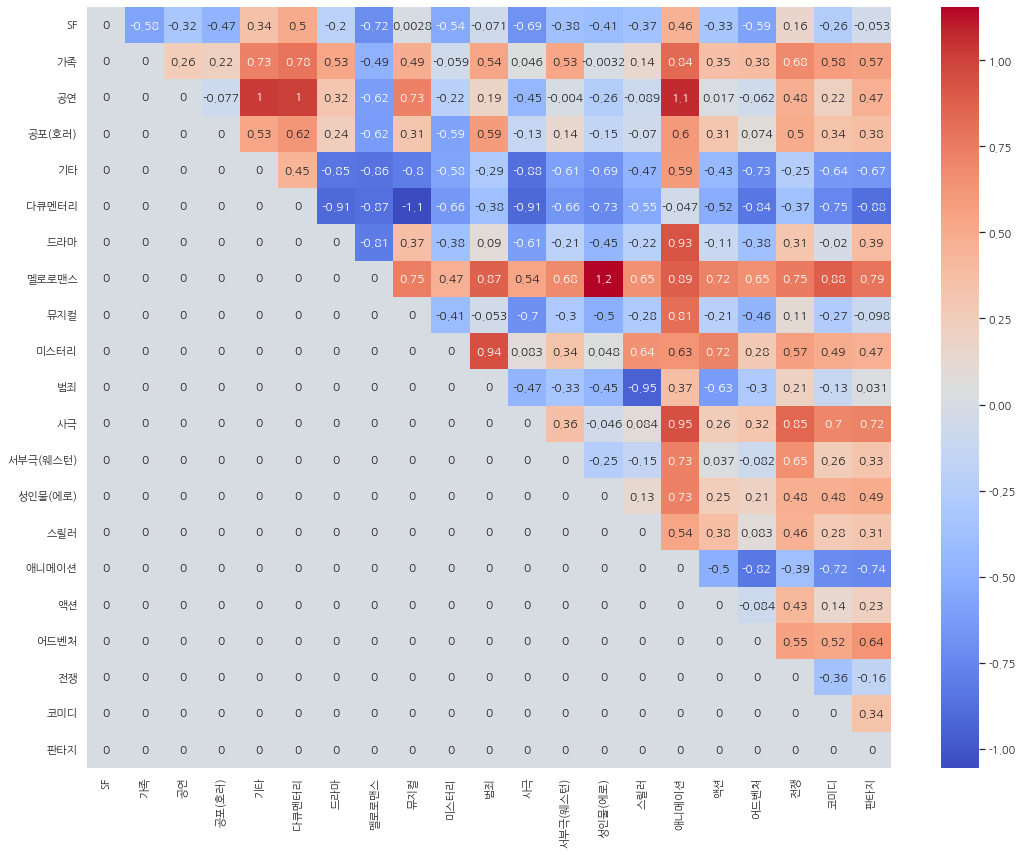

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 처리
plt.rcParams['axes.unicode_minus'] = False

# 매트릭스 크기 크게 설정 (figsize=(너비, 높이)로 조정 가능)
plt.figure(figsize=(18, 14))  # 여기서 (12, 10)은 원하는 크기 값으로 변경 가능합니다.

# 히트맵 그리기
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True, cmap='coolwarm')

# 그래프 출력
plt.show()


# 결과. HeatMap 해석하기

행을 기준으로 결과를 해석할 때,

SF는 전체적으로 WEAT 점수가 낮아 푸른색을 띠며, 상업 영화라는 것을 의미함.
반대로, 가족은 전반적으로 붉은 색을 띠고, 예술 영화라는 것을 의미함.

기타, 다큐멘터리도 사실 정보 기반 장르로 위에서 점수 분석을 하며 설명했듯이 상업 영화라는 것을 의미.

의외인 점은, 성인물 장르가 생각보다 붉은색을 띤다는 것.
위에서 " 멜로로맨스 - 성인물(에로): 1.1555755138397217 " 은 압도적으로 예술 장르인 멜로로맨스와 비교해서 그렇지 예술 장르로도 많이 표현이 되는 것 같다.

## PCA 로 나타내보기

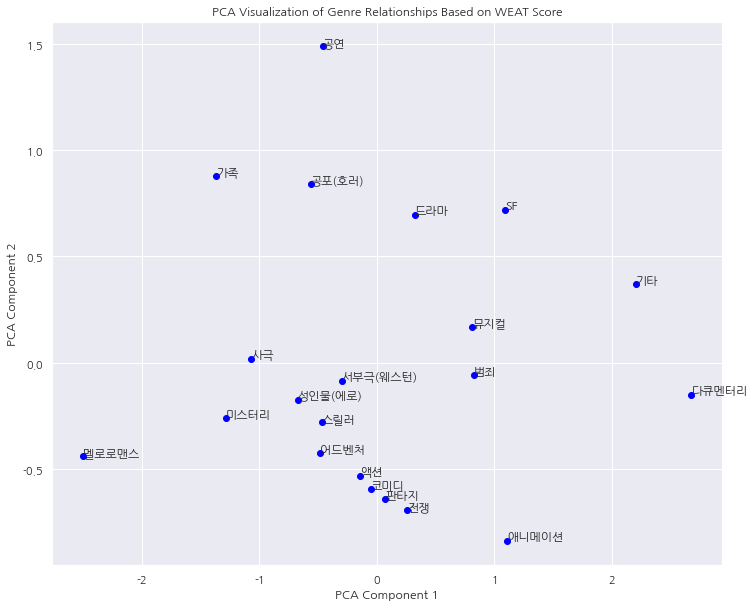

In [75]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# PCA를 적용할 대상은 matrix에 저장된 WEAT score 결과입니다.
# matrix에 있는 각 장르 사이의 관계를 2차원으로 축소합니다.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(matrix)

# 시각화를 위한 그래프 생성
plt.figure(figsize=(12, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')

# 각 장르 이름을 그래프에 표시
for i, genre in enumerate(genre_name):
    plt.text(pca_result[i, 0], pca_result[i, 1], genre, fontsize=12)

# 그래프 출력
plt.title("PCA Visualization of Genre Relationships Based on WEAT Score")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


하위 중앙부에는 '어드벤처','액션','코미디','판타지' 등의 상업적 영화가 주로 밀집해져있다.
예술 영화에 가까운 '공연','가족','드라마','멜로로맨스' 등은 전체적으로 멀리 퍼져있다.

# 회고

단어들의 평향성을 확인하고 이를 시각적으로 나타낼 수 있다는게 매우 유익했다.
영화 장르가 아니라 노드에 나왔던 것처럼 사회적 편향을 담긴 데이터를 판단할 때는 더 유익하게 사용할 수 있을 것 같다.